In [1]:
import pandas as pd
df = pd.read_csv("precisceno_Ad1_za_analizo.csv")
df.head()

,spol,spol_starša,izob_matere,izob_očeta,število,izpolnjeval,vključen,status_matere,status_očeta,jezik,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,0,1,0,1,5.0,0,da,3,3,8,...,2.000000,2.000,2.000000,2.0,2.000,2.00,0.50,1.500000,2.0,2.000000
1,0,1,2,3,4.0,1,da,3,3,7,...,1.000000,1.000,1.000000,1.0,1.000,1.00,1.00,1.000000,1.0,1.000000
2,0,1,3,4,3.0,0,da,3,3,7,...,2.000000,1.750,1.857143,2.0,1.875,2.00,1.25,1.666667,2.0,1.833333
3,0,1,3,3,4.0,1,da,3,3,7,...,1.142857,0.250,0.142857,0.4,1.000,1.00,0.50,1.000000,2.0,1.583333
4,1,1,3,3,4.0,1,da,3,3,7,...,1.928571,1.125,1.428571,1.0,1.625,1.75,1.00,0.166667,1.0,0.833333


In [2]:
column_names = df.columns.tolist()

print(column_names)

unique_values = df['izpolnjeval'].unique()

print("Unique values in 'Column1':", unique_values)

['spol', 'spol_starša', 'izob_matere', 'izob_očeta', 'število', 'izpolnjeval', 'vključen', 'status_matere', 'status_očeta', 'jezik', 'OPP', 'drugo', 'age_in_months', 'starost_vkljucitev', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19']
Unique values in 'Column1': [0 1 2]


stevilo = st. druzinskih clanov

izpolnjeval = kateri otrok po vrsti (prvorojenec, ...)

vkljucen = vklj. v vrtec... kasneje desno stolpec tudi v mesecih koliko casa

status = brezposelen....

OPP = posebne potrebe

In [3]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')


V tem df imamo seveda vključene same NaN, saj so izpolnjevali V10-...

In [4]:
df = df.drop(columns=['vključen'])
df = df.drop(columns=['drugo'])#dropamo se drugo
df.head()
df1 = df

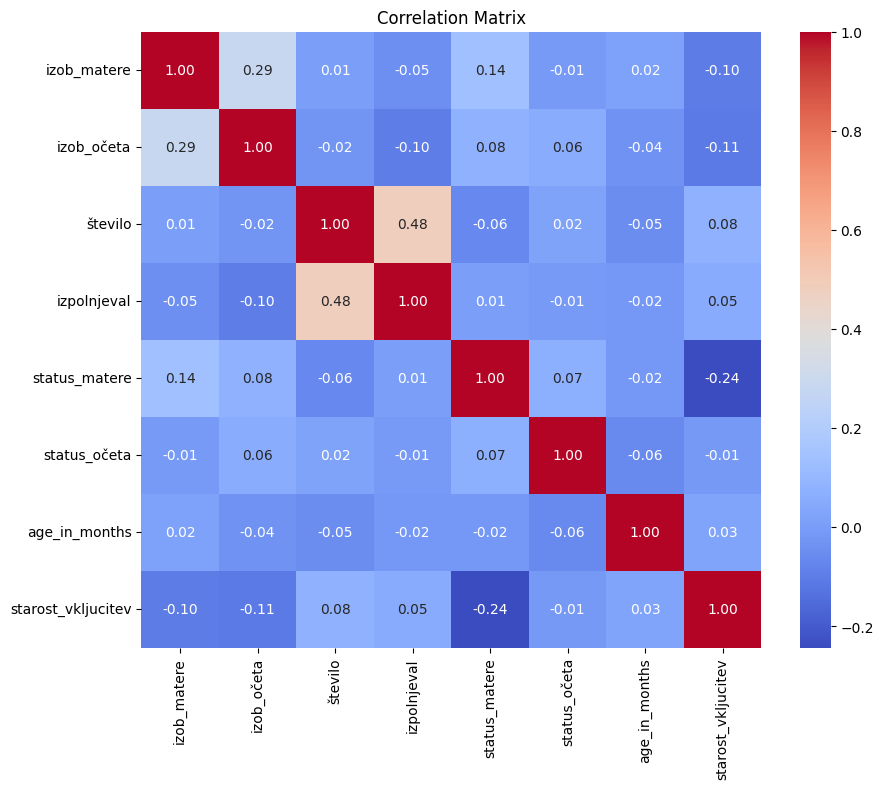

In [5]:
from sklearn.preprocessing import StandardScaler

categorical_features = ['spol', 'spol_starša', "jezik", "OPP"]
ordinal_features = ['izob_matere', 'izob_očeta', 'število', 'izpolnjeval', 'status_matere', 'status_očeta',]
continuous_features = ['age_in_months', 'starost_vkljucitev']

output_variables = ['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19']

# Standardize continuous features
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Convert categorical features into dummy variables
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Concatenating ordinal and continuous features
df_combined = pd.concat([df[ordinal_features], df[continuous_features]], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt


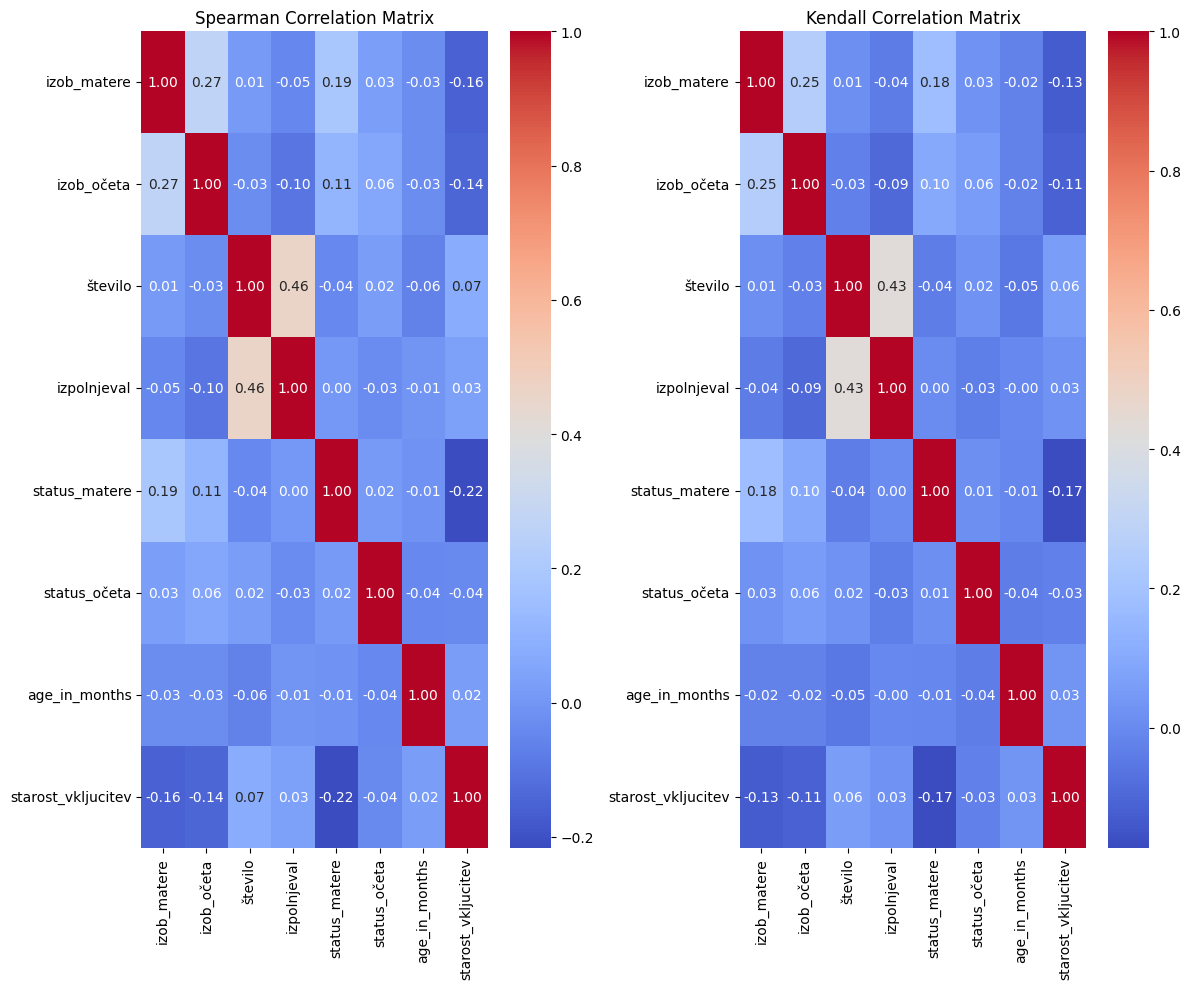

In [6]:
# Compute correlation matrix with Spearman correlation
correlation_matrix_spearman = df_combined.corr(method='spearman')

# Compute correlation matrix with Kendall correlation
correlation_matrix_kendall = df_combined.corr(method='kendall')

# Create heatmaps for Spearman and Kendall correlation matrices
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Spearman Correlation Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Kendall Correlation Matrix')

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Compute Spearman correlation matrix
spearman_corr_matrix = df_combined.corr(method='spearman')

# Get absolute values of Spearman correlation coefficients
abs_spearman_corr = abs(spearman_corr_matrix)

# Get the upper triangular part of the correlation matrix to avoid duplicate pairs
upper_triangular = abs_spearman_corr.where(np.triu(np.ones(abs_spearman_corr.shape), k=1).astype(np.bool))

# Stack the correlation matrix to get pairs with corresponding correlation values
stacked_corr = upper_triangular.stack()

# Sort the correlations by absolute value in descending order
sorted_corr = stacked_corr.sort_values(ascending=False)

# Extract the 5 most correlated pairs
top_correlations = sorted_corr.head(5)

# Print the top correlated pairs with their coefficients
for idx, (pair, corr) in enumerate(top_correlations.iteritems(), 1):
    var1, var2 = pair
    coef = spearman_corr_matrix.loc[var1, var2]
    print(f"Top {idx}: {var1} - {var2}, Correlation Coefficient: {coef:.4f}")


Top 1: število - izpolnjeval, Correlation Coefficient: 0.4601
Top 2: izob_matere - izob_očeta, Correlation Coefficient: 0.2658
Top 3: status_matere - starost_vkljucitev, Correlation Coefficient: -0.2160
Top 4: izob_matere - status_matere, Correlation Coefficient: 0.1916
Top 5: izob_matere - starost_vkljucitev, Correlation Coefficient: -0.1584


C:\Users\borbr\AppData\Local\Temp\ipykernel_6484\3176326599.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangular = abs_spearman_corr.where(np.triu(np.ones(abs_spearman_corr.shape), k=1).astype(np.bool))
C:\Users\borbr\AppData\Local\Temp\ipykernel_6484\3176326599.py:24: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, (pair, corr) in enumerate(top_correlations.iteritems(), 1):


In [7]:
import scipy.stats as stats

# Function to perform assumptions testing
def correlation_assumptions_testing(data):
    tests = {}
    
    # Shapiro-Wilk test for normality
    for column in data.columns:
        stat, p = stats.shapiro(data[column])
        tests[f'{column}_normality'] = {'statistic': stat, 'p-value': p}
    
    # Test for linearity (not directly available)
    # You can assess linearity visually using scatter plots
    
    return tests

# Perform assumptions testing
assumptions_tests = correlation_assumptions_testing(df_combined)

# Print the results
for test, values in assumptions_tests.items():
    print(f'{test}: Statistic={values["statistic"]}, p-value={values["p-value"]}')


izob_matere_normality: Statistic=0.722463071346283, p-value=1.722950409758432e-28
izob_očeta_normality: Statistic=0.7544951438903809, p-value=4.37485155777667e-27
število_normality: Statistic=0.8549766540527344, p-value=1.754498142942205e-21
izpolnjeval_normality: Statistic=0.746859073638916, p-value=1.9663145767980974e-27
status_matere_normality: Statistic=0.6385443210601807, p-value=1.2094911755907241e-31
status_očeta_normality: Statistic=0.21926778554916382, p-value=7.824850624789779e-42
age_in_months_normality: Statistic=0.9753793478012085, p-value=1.1330815397059268e-07
starost_vkljucitev_normality: Statistic=0.8664020299911499, p-value=1.1358819937771168e-20


In [8]:
from scipy import stats

# Compute point-biserial correlation coefficient for each dummy variable with continuous variables
for dummy_feature in df.columns:
    if dummy_feature.startswith(tuple(categorical_features)):
        for cont_feature in continuous_features:
            # Compute point-biserial correlation coefficient
            correlation, p_value = stats.pointbiserialr(df[dummy_feature], df[cont_feature])
            
            # Print correlation coefficient and p-value
            print(f"Point-Biserial Correlation between {dummy_feature} and {cont_feature}: {correlation}, p-value: {p_value}")


Point-Biserial Correlation between spol_1 and age_in_months: -0.0635927547285871, p-value: 0.14758512148361072
Point-Biserial Correlation between spol_1 and starost_vkljucitev: -0.01340237431842026, p-value: 0.7604427946902744
Point-Biserial Correlation between spol_starša_1 and age_in_months: -0.0251274653881196, p-value: 0.5675213534797877
Point-Biserial Correlation between spol_starša_1 and starost_vkljucitev: -0.07927409048525959, p-value: 0.07088390332592173
Point-Biserial Correlation between jezik_1 and age_in_months: 0.053765250335541095, p-value: 0.22096305499155677
Point-Biserial Correlation between jezik_1 and starost_vkljucitev: -0.031241443510387146, p-value: 0.4771625509008395
Point-Biserial Correlation between jezik_2 and age_in_months: -0.021096451960726476, p-value: 0.631249554329171
Point-Biserial Correlation between jezik_2 and starost_vkljucitev: 0.22622827688604352, p-value: 1.846793735692975e-07
Point-Biserial Correlation between jezik_3 and age_in_months: 0.064129

In [27]:
df1.head()

,spol,spol_starša,izob_matere,izob_očeta,število,izpolnjeval,status_matere,status_očeta,jezik,OPP,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,0,1,0,1,5.0,0,3,3,8,1,...,2.000000,2.000,2.000000,2.0,2.000,2.00,0.50,1.500000,2.0,2.000000
1,0,1,2,3,4.0,1,3,3,7,1,...,1.000000,1.000,1.000000,1.0,1.000,1.00,1.00,1.000000,1.0,1.000000
2,0,1,3,4,3.0,0,3,3,7,1,...,2.000000,1.750,1.857143,2.0,1.875,2.00,1.25,1.666667,2.0,1.833333
3,0,1,3,3,4.0,1,3,3,7,1,...,1.142857,0.250,0.142857,0.4,1.000,1.00,0.50,1.000000,2.0,1.583333
4,1,1,3,3,4.0,1,3,3,7,1,...,1.928571,1.125,1.428571,1.0,1.625,1.75,1.00,0.166667,1.0,0.833333


In [28]:
df1["spol"].unique()

array([0, 1], dtype=int64)

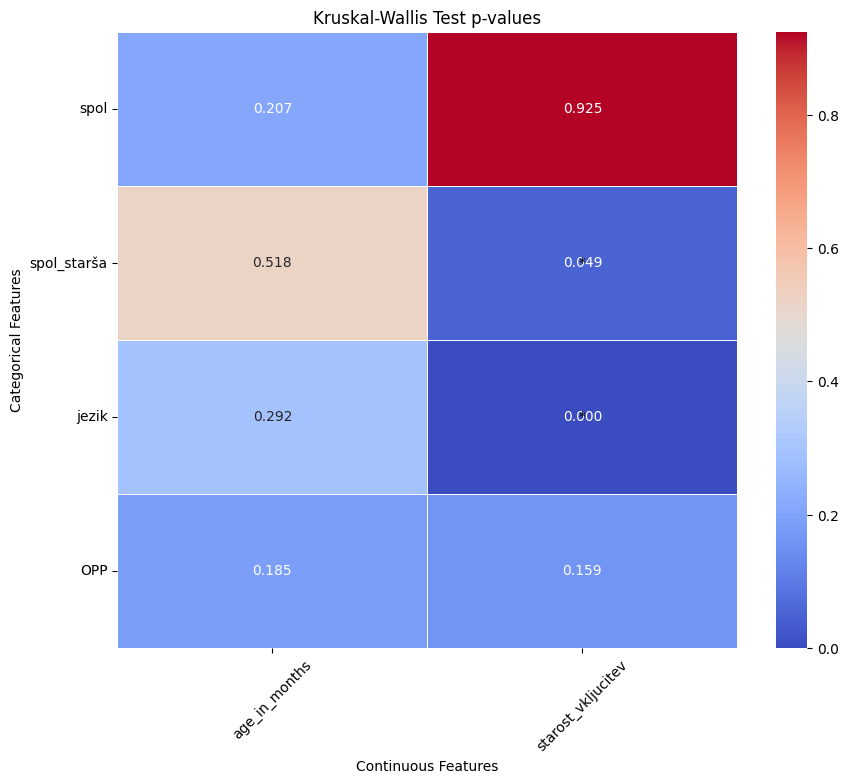

In [29]:
# Create a matrix to store p-values
p_values_matrix = np.zeros((len(categorical_features), len(continuous_features)))

# Compute Kruskal-Wallis test for each categorical variable with continuous variables
for i, cat_feature in enumerate(categorical_features):
    for j, cont_feature in enumerate(continuous_features):
        # Perform Kruskal-Wallis test
        statistic, p_value = kruskal(*[df1[cont_feature][df1[cat_feature] == category] for category in df1[cat_feature].unique()])
        
        # Store p-value in the matrix
        p_values_matrix[i, j] = p_value

# Create heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(p_values_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
ax.set_xticklabels(continuous_features, rotation=45)
ax.set_yticklabels(categorical_features, rotation=0)
plt.title('Kruskal-Wallis Test p-values')
plt.xlabel('Continuous Features')
plt.ylabel('Categorical Features')

# Annotate cells where p-value < 0.05
for i in range(len(categorical_features)):
    for j in range(len(continuous_features)):
        if p_values_matrix[i, j] < 0.05:
            ax.text(j+0.5, i+0.5, '*', ha='center', va='center', color='black')

plt.show()
